<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week3/02_Regression_Model_MaterialStrength_M_Rakan_Bagus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/MaterialStrength.csv'

# Membaca file CSV
df = pd.read_csv(file_path)

In [ ]:
# Menampilkan beberapa baris pertama dari dataset untuk melihat strukturnya
print("Baris pertama dari dataset:")
print(df.head())  # Menampilkan 5 baris pertama dari dataset

# Mengecek apakah ada nilai yang hilang (missing values) pada dataset
missing_values = df.isnull().sum()  # Menghitung jumlah missing values pada setiap kolom
print("\nNilai yang hilang pada setiap kolom:")
print(missing_values)  # Menampilkan jumlah missing values

# Menampilkan daftar semua kolom dalam dataset untuk memastikan nama kolom target yang benar
print("\nNama Kolom dalam Dataset:")
print(df.columns)

Baris pertama dari dataset:
      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  

Nilai yang hilang pada setiap kolom:
x1                0
x2                0
x3                0
x4                0
x5                0
x6                0
x7                0
x8                0
x9   

In [ ]:
# Tahap 2: Data Preprocessing
# Memisahkan fitur (X) dan target (y)
X = df.drop('target_feature', axis=1)  # 'X' adalah semua fitur kecuali kolom target
y = df['target_feature']  # 'y' adalah kolom target

# Mengonversi fitur kategori menjadi numerik menggunakan Label Encoding
# Ini untuk memastikan bahwa semua kolom kategori diubah ke format numerik
categorical_cols = X.select_dtypes(include=['object']).columns  # Mendeteksi kolom kategori
label_encoders = {}  # Menyimpan encoder untuk setiap kolom kategori

for col in categorical_cols:
    le = LabelEncoder()  # Membuat instance LabelEncoder
    X[col] = le.fit_transform(X[col])  # Mengonversi kolom kategori menjadi numerik
    label_encoders[col] = le  # Menyimpan encoder untuk referensi di masa depan

# Normalisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()  # Membuat instance StandardScaler
X_scaled = scaler.fit_transform(X)  # Menghasilkan array yang terstandarisasi

In [ ]:
# Tahap 3: Split dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Tahap 4: Membuat dan melatih model Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)  # Membuat model Decision Tree Regressor dengan max_depth=5
dt_regressor.fit(X_train, y_train)  # Melatih model menggunakan data training

# Tahap 4: Membuat dan melatih model k-NN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Membuat model k-NN Regressor dengan 5 tetangga
knn_regressor.fit(X_train, y_train)  # Melatih model menggunakan data training

# Tahap 4: Membuat dan melatih model Linear Regression
lr_model = LinearRegression()  # Membuat model Linear Regression
lr_model.fit(X_train, y_train)  # Melatih model menggunakan data training

# Tahap 4: Membuat dan melatih model Polynomial Regression
poly = PolynomialFeatures(degree=2)  # Mengatur derajat polinomial menjadi 2
X_poly_train = poly.fit_transform(X_train)  # Mengubah fitur menjadi basis fungsi polinomial
X_poly_test = poly.transform(X_test)  # Transformasi data testing
poly_model = LinearRegression()  # Membuat model Linear Regression
poly_model.fit(X_poly_train, y_train)  # Melatih model dengan data training polinomial


LinearRegression()

In [ ]:
# Tahap 5: Evaluasi Model
# Evaluasi Decision Tree Regressor
dt_y_pred = dt_regressor.predict(X_test)  # Prediksi nilai target menggunakan model Decision Tree
dt_mse = mean_squared_error(y_test, dt_y_pred)  # Menghitung MSE
dt_rmse = np.sqrt(dt_mse)  # Menghitung RMSE
dt_r2 = r2_score(y_test, dt_y_pred)  # Menghitung R-squared

# Evaluasi k-NN Regressor
knn_y_pred = knn_regressor.predict(X_test)  # Prediksi nilai target menggunakan model k-NN
knn_mse = mean_squared_error(y_test, knn_y_pred)  # Menghitung MSE
knn_rmse = np.sqrt(knn_mse)  # Menghitung RMSE
knn_r2 = r2_score(y_test, knn_y_pred)  # Menghitung R-squared

# Evaluasi Linear Regression
lr_y_pred = lr_model.predict(X_test)  # Prediksi nilai target menggunakan model Linear Regression
lr_mse = mean_squared_error(y_test, lr_y_pred)  # Menghitung MSE
lr_rmse = np.sqrt(lr_mse)  # Menghitung RMSE
lr_r2 = r2_score(y_test, lr_y_pred)  # Menghitung R-squared

# Evaluasi Polynomial Regression
poly_y_pred = poly_model.predict(X_poly_test)  # Prediksi nilai target menggunakan model Polynomial Regression
poly_mse = mean_squared_error(y_test, poly_y_pred)  # Menghitung MSE
poly_rmse = np.sqrt(poly_mse)  # Menghitung RMSE
poly_r2 = r2_score(y_test, poly_y_pred)  # Menghitung R-squared

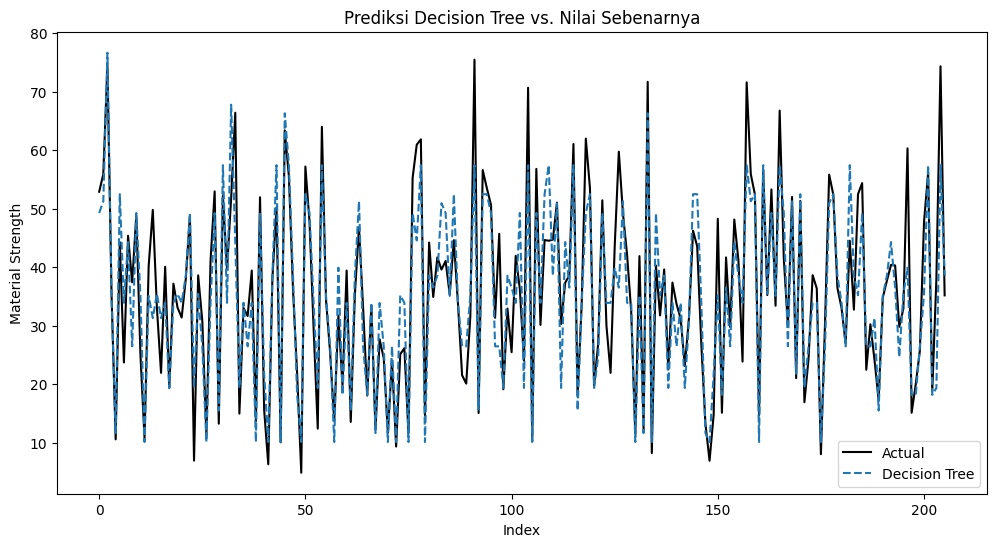

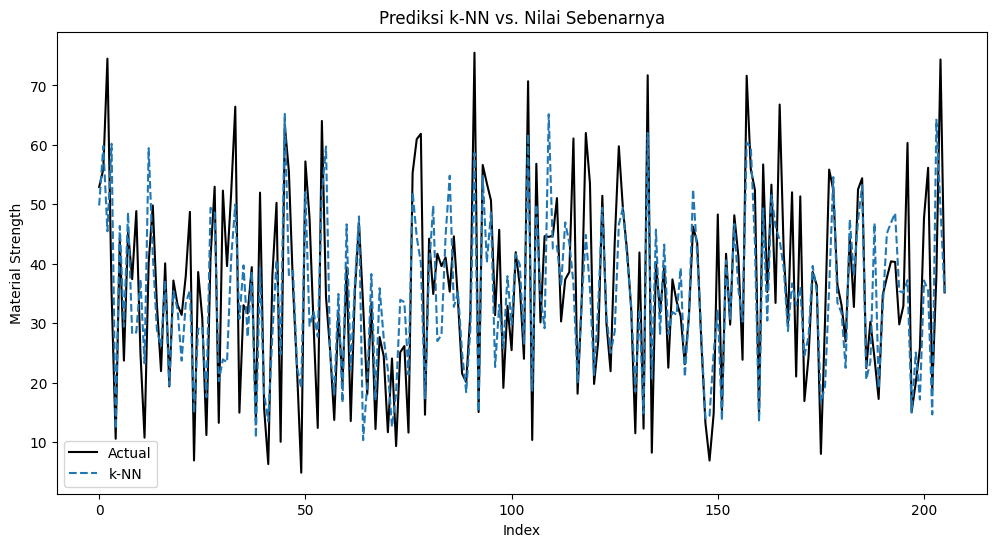

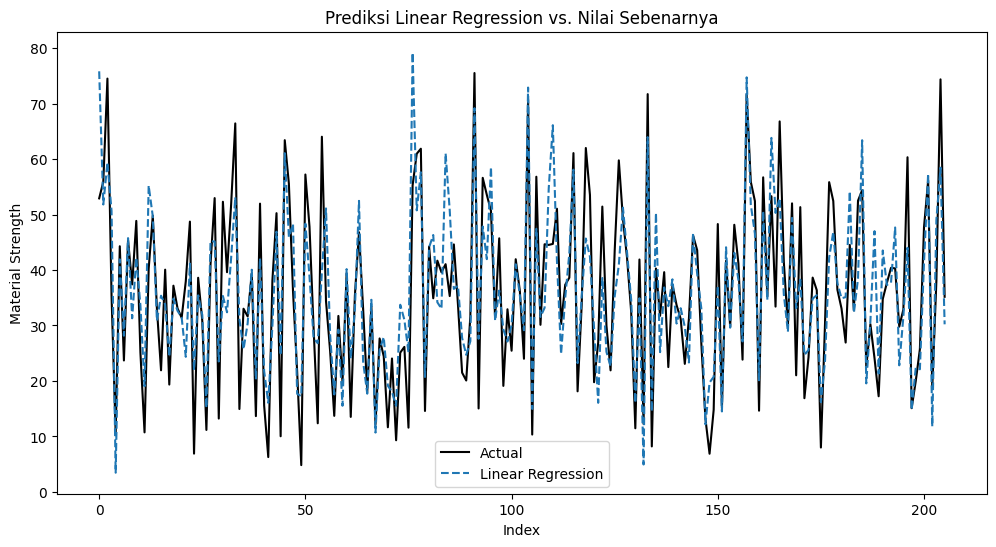

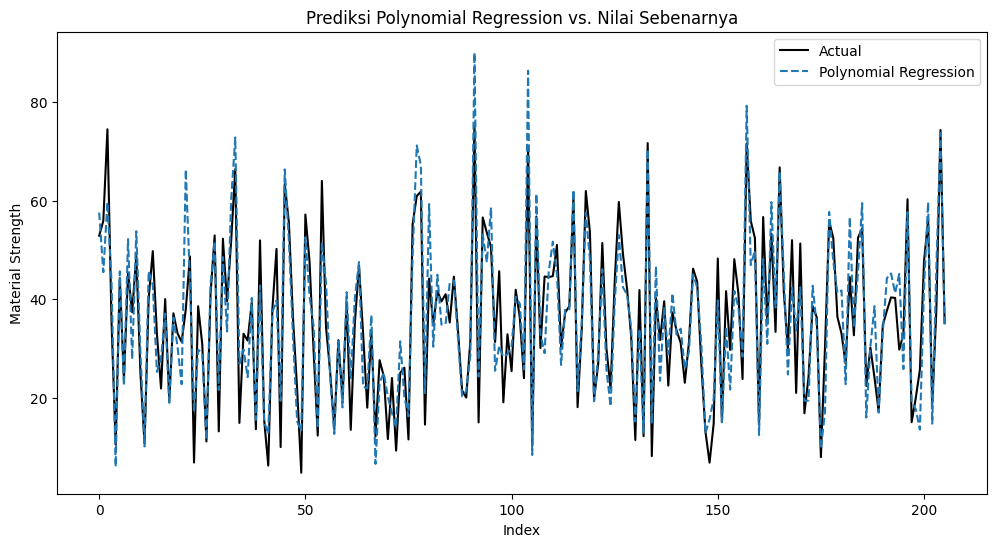

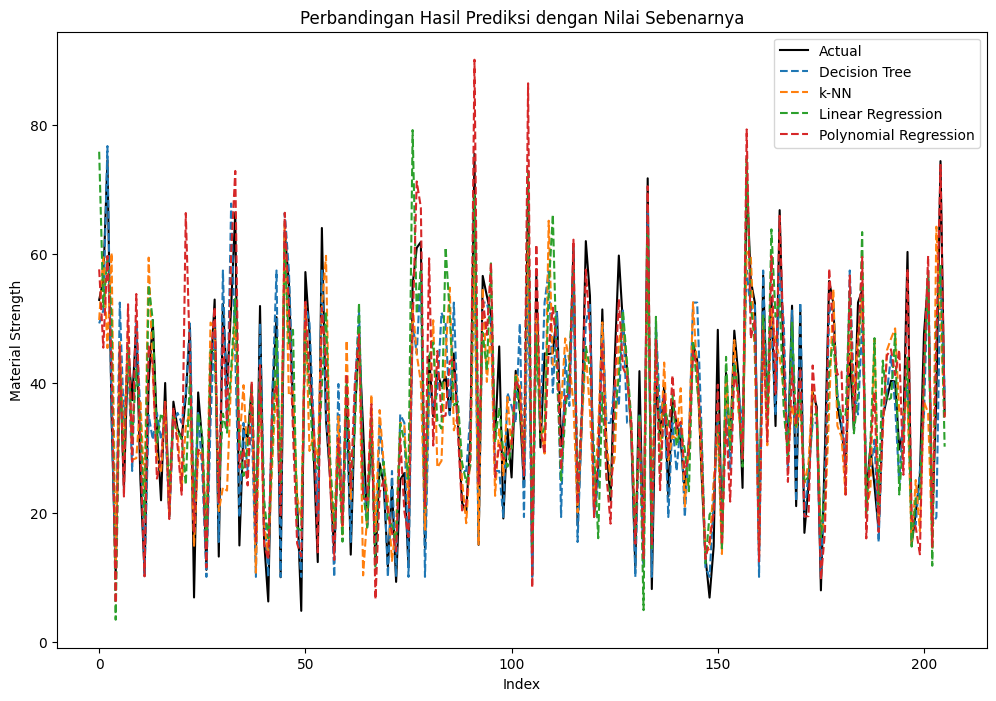

In [ ]:
# Tahap 6: Visualisasi Perbandingan Hasil Prediksi untuk masing-masing model

# Grafik Prediksi Decision Tree
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(dt_y_pred, label='Decision Tree', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Material Strength')
plt.title('Prediksi Decision Tree vs. Nilai Sebenarnya')
plt.legend()
plt.show()

# Grafik Prediksi k-NN
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(knn_y_pred, label='k-NN', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Material Strength')
plt.title('Prediksi k-NN vs. Nilai Sebenarnya')
plt.legend()
plt.show()

# Grafik Prediksi Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(lr_y_pred, label='Linear Regression', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Material Strength')
plt.title('Prediksi Linear Regression vs. Nilai Sebenarnya')
plt.legend()
plt.show()

# Grafik Prediksi Polynomial Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(poly_y_pred, label='Polynomial Regression', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Material Strength')
plt.title('Prediksi Polynomial Regression vs. Nilai Sebenarnya')
plt.legend()
plt.show()

# Grafik Gabungan Semua Model
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(dt_y_pred, label='Decision Tree', linestyle='--')
plt.plot(knn_y_pred, label='k-NN', linestyle='--')
plt.plot(lr_y_pred, label='Linear Regression', linestyle='--')
plt.plot(poly_y_pred, label='Polynomial Regression', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Material Strength')
plt.title('Perbandingan Hasil Prediksi dengan Nilai Sebenarnya')
plt.legend()
plt.show()

In [ ]:
# Tahap 7: Menyusun hasil evaluasi ke dalam DataFrame untuk perbandingan
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'k-NN', 'Linear Regression', 'Polynomial Regression'],
    'RMSE': [dt_rmse, knn_rmse, lr_rmse, poly_rmse],
    'MSE': [dt_mse, knn_mse, lr_mse, poly_mse],
    'R-squared': [dt_r2, knn_r2, lr_r2, poly_r2]
})

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model:")
print(results_df)


Hasil Evaluasi Model:
                   Model       RMSE         MSE  R-squared
0          Decision Tree   6.833933   46.702646   0.818755
1                   k-NN  10.184988  103.733984   0.597426
2      Linear Regression   8.687203   75.467499   0.707124
3  Polynomial Regression   6.572441   43.196980   0.832360
